# ЛАБОРАТОРНАЯ РАБОТА №1 по Анализу Данных
## Щеглетовой Татьяны 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

### Загружаем данные

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00198/Faults.NNA'
# Набор данных о неисправностях стальных плит
data = pd.read_csv(url, header = None, sep = '\t', engine='python')

Данный dataset о дефектах стальных плит состоит из 7 зависимых переменных (Pastry, Z_Scratch, K_Scatch, Stains, Dirtiness, Bumps,
                                                                           Other_Faults)
и 27 атрибутов в количестве 1941 экземпляр. Пропущенные значения в данном dataset отсутстуют. 

In [3]:
data.columns = [u'X_Minimum', u'X_Maximum', u'Y_Minimum', u'Y_Maximum', u'Pixels_Areas', u'X_Perimeter', 
                u'Y_Perimeter', u'Sum_of_Luminosity', u'Minimum_of_Luminosity', u'Maximum_of_Luminosity',
                u'Length_of_Conveyer', u'TypeOfSteel_A300', u'TypeOfSteel_A400', u'Steel_Plate_Thickness',
                u'Edges_Index', u'Empty_Index', u'Square_Index', u'Outside_X_Index', u'Edges_X_Index', 
                u'Edges_Y_Index', u'Outside_Global_Index', u'LogOfAreas', u'Log_X_Index', u'Log_Y_Index', 
                u'Orientation_Index', u'Luminosity_Index', u'SigmoidOfAreas', u'Pastry', u'Z_Scratch', 
                u'K_Scatch', u'Stains', u'Dirtiness', u'Bumps', u'Other_Faults']

### Анализируем данные

In [4]:
type(data)

pandas.core.frame.DataFrame

Узнаем размер таблицы:

In [5]:
print(data.shape) # таблица содержит 1941 строку (объекта) и 31 столбца (признака)

(1941, 34)


Можем посмотреть на несколько первых и несколько последних строк этой таблицы, чтобы получить представление об имеющихся данных:

In [6]:
data.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0


In [7]:
data.tail()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
1936,249,277,325780,325796,273,54,22,35033,119,141,...,-0.4286,0.0026,0.7254,0,0,0,0,0,0,1
1937,144,175,340581,340598,287,44,24,34599,112,133,...,-0.4516,-0.0582,0.8173,0,0,0,0,0,0,1
1938,145,174,386779,386794,292,40,22,37572,120,140,...,-0.4828,0.0052,0.7079,0,0,0,0,0,0,1
1939,137,170,422497,422528,419,97,47,52715,117,140,...,-0.0606,-0.0171,0.9919,0,0,0,0,0,0,1
1940,1261,1281,87951,87967,103,26,22,11682,101,133,...,-0.2000,-0.1139,0.5296,0,0,0,0,0,0,1


К элементам таблицы можно обращаться, к примеру, так:

In [8]:
data.at[0, 'Sum_of_Luminosity']

24220

Или так:

In [9]:
data['SigmoidOfAreas'][5]

0.9874

Можно вывести все значения какого-то определённого признака, например:

In [10]:
data['SigmoidOfAreas']

0       0.5822
1       0.2984
2       0.2150
3       0.5212
4       1.0000
5       0.9874
6       1.0000
7       0.3359
8       0.5593
9       1.0000
10      0.8612
11      0.9048
12      0.9093
13      0.8299
14      0.9888
15      1.0000
16      1.0000
17      0.9918
18      0.2998
19      0.5362
20      0.6173
21      0.4317
22      0.2942
23      0.6422
24      0.4913
25      0.3464
26      0.8355
27      0.2150
28      1.0000
29      0.7822
         ...  
1911    0.5805
1912    0.9732
1913    0.4138
1914    0.2699
1915    0.2469
1916    0.4514
1917    0.3068
1918    0.7359
1919    0.6268
1920    0.7833
1921    0.9263
1922    0.8952
1923    0.5951
1924    0.9324
1925    0.6781
1926    0.3068
1927    0.3663
1928    0.9920
1929    0.6438
1930    0.7598
1931    0.8183
1932    0.8299
1933    0.9899
1934    0.8971
1935    0.9992
1936    0.7254
1937    0.8173
1938    0.7079
1939    0.9919
1940    0.5296
Name: SigmoidOfAreas, Length: 1941, dtype: float64

А также узнать тип объектов:

In [11]:
type(data['Sum_of_Luminosity'][4])

numpy.int64

In [12]:
data['Sum_of_Luminosity'].dtype.name

'int64'

In [13]:
type(data['Sum_of_Luminosity'])

pandas.core.series.Series

In [14]:
data[['Sum_of_Luminosity', 'Pixels_Areas']].head()

,Sum_of_Luminosity,Pixels_Areas
0,24220,267
1,11397,108
2,7972,71
3,18996,176
4,246930,2409


С помощью метода describe() получим некоторую сводную информацию по всей таблице. По умолчанию будет выдана информация только для количественных признаков. Это общее их количество (count), среднее значение (mean), стандартное отклонение (std), минимальное (min), макcимальное (max) значения, медиана (50%) и значения нижнего (25%) и верхнего (75%) квартилей:

In [15]:
data.describe() # в нашем случае все признаки количественные

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
count,1941.000000,1941.000000,1.941000e+03,1.941000e+03,1941.000000,1941.000000,1941.000000,1.941000e+03,1941.000000,1941.000000,...,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000
mean,571.136012,617.964451,1.650685e+06,1.650739e+06,1893.878413,111.855229,82.965997,2.063121e+05,84.548686,130.193715,...,0.083288,-0.131305,0.585420,0.081401,0.097888,0.201443,0.037094,0.028336,0.207110,0.346728
std,520.690671,497.627410,1.774578e+06,1.774590e+06,5168.459560,301.209187,426.482879,5.122936e+05,32.134276,18.690992,...,0.500868,0.148767,0.339452,0.273521,0.297239,0.401181,0.189042,0.165973,0.405339,0.476051
min,0.000000,4.000000,6.712000e+03,6.724000e+03,2.000000,2.000000,1.000000,2.500000e+02,0.000000,37.000000,...,-0.991000,-0.998900,0.119000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,192.000000,4.712530e+05,4.712810e+05,84.000000,15.000000,13.000000,9.522000e+03,63.000000,124.000000,...,-0.333300,-0.195000,0.248200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,435.000000,467.000000,1.204128e+06,1.204136e+06,174.000000,26.000000,25.000000,1.920200e+04,90.000000,127.000000,...,0.095200,-0.133000,0.506300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1053.000000,1072.000000,2.183073e+06,2.183084e+06,822.000000,84.000000,83.000000,8.301100e+04,106.000000,140.000000,...,0.511600,-0.066600,0.999800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1705.000000,1713.000000,1.298766e+07,1.298769e+07,152655.000000,10449.000000,18152.000000,1.159141e+07,203.000000,253.000000,...,0.991700,0.642100,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Или проверить информацию о конкретном признаке:

In [16]:
data['Pixels_Areas'].describe()

count      1941.000000
mean       1893.878413
std        5168.459560
min           2.000000
25%          84.000000
50%         174.000000
75%         822.000000
max      152655.000000
Name: Pixels_Areas, dtype: float64

Количество элементов во всех признаках равно общему количеству объектов (1941), поэтому чистка от пропусков не требуется.

# Визуализация 

Функция scatter_matrix из модуля pandas.tools.plotting позволяет построить для каждой количественной переменной гистограмму, а для каждой пары таких переменных – диаграмму рассеяния:

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


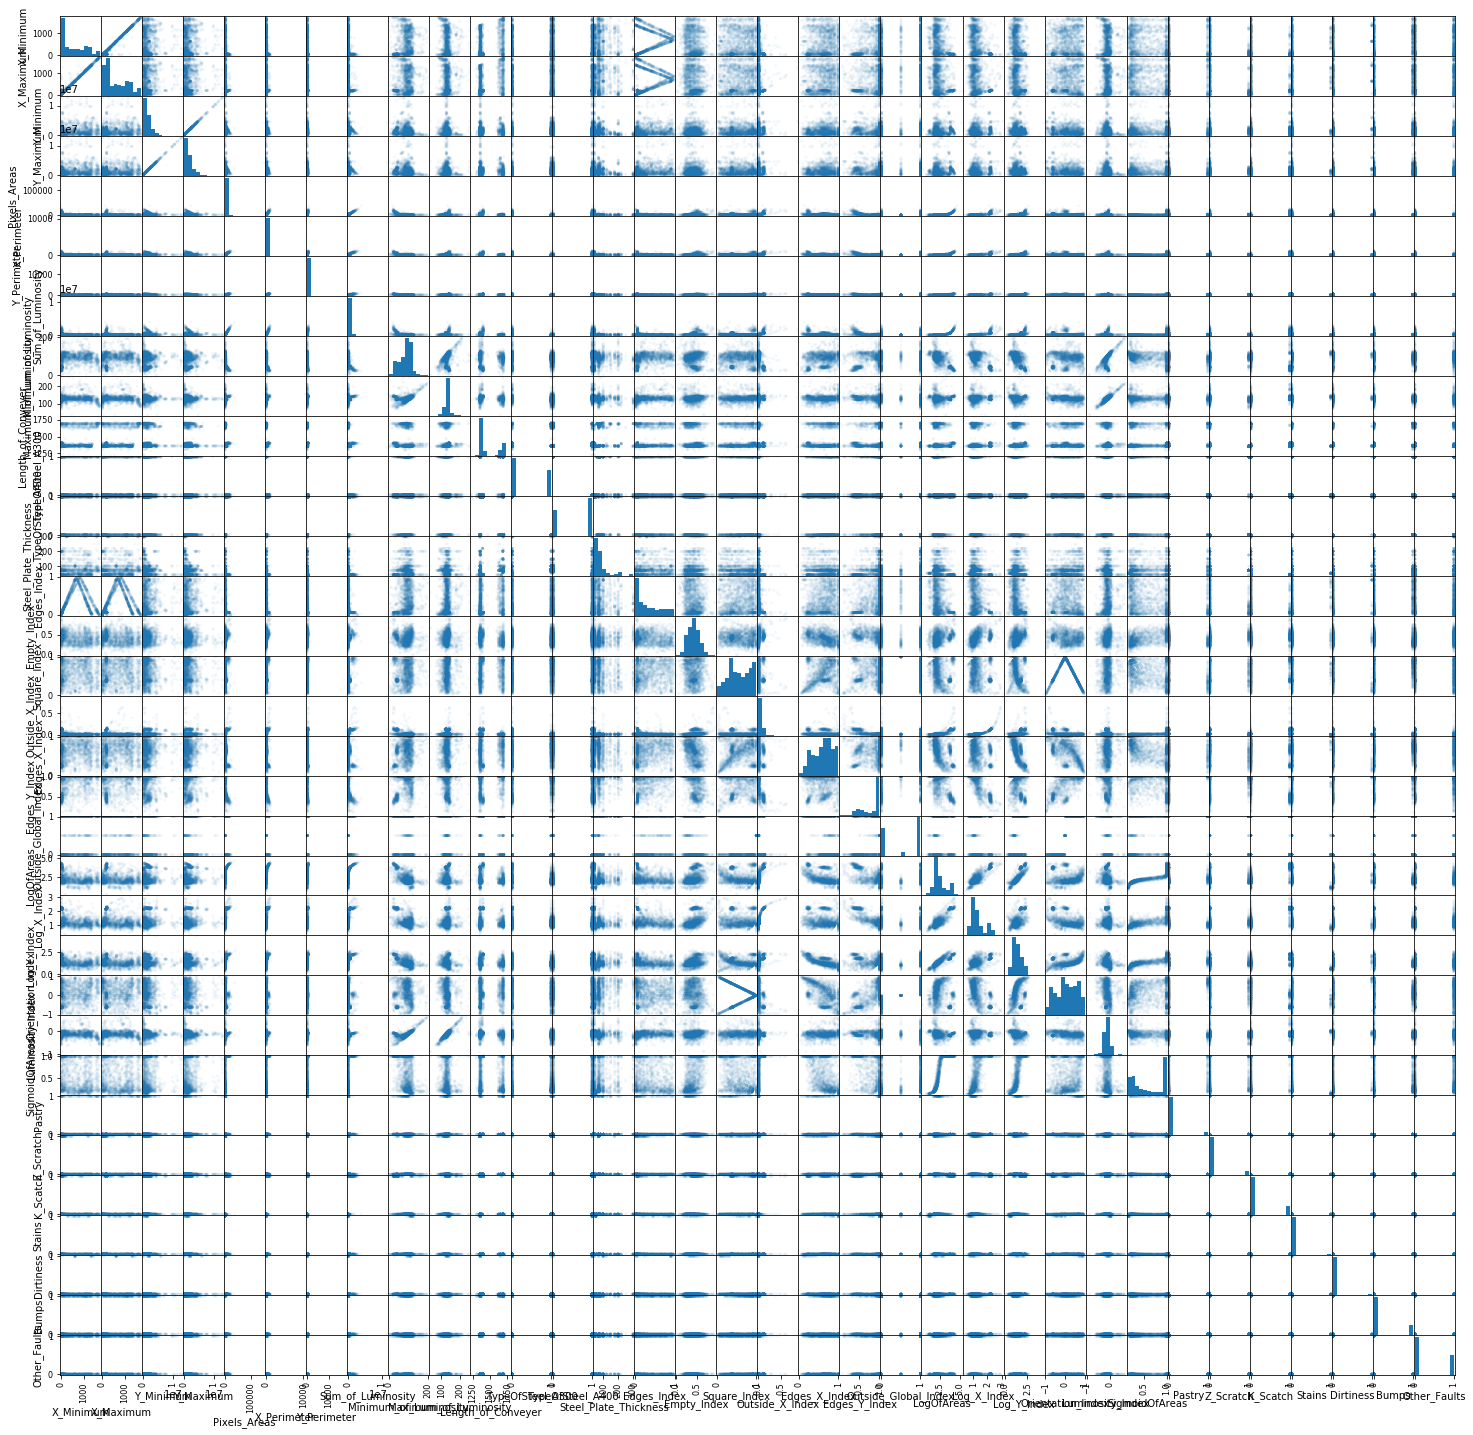

In [17]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(data, alpha = .05, figsize = (25, 25))
pass

Из построенной матрицы видно, что все признаки ведут себя совершенно по разному: кто-то сильно коррелирует, а между какими-то связь практически отсутствует.

Для более подробного анализа зависимости между объектами можно посмотреть в матрицу корреляции:

In [18]:
data.corr()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
X_Minimum,1.000000,0.988314,0.041821,0.041807,-0.307322,-0.258937,-0.118757,-0.339045,0.237637,-0.075554,...,0.178585,-0.031578,-0.355251,0.134956,-0.228960,-0.419264,0.073740,0.103924,0.221296,0.164804
X_Maximum,0.988314,1.000000,0.052147,0.052135,-0.225399,-0.186326,-0.090138,-0.247052,0.168649,-0.062392,...,0.115019,-0.038996,-0.286736,0.119814,-0.258178,-0.336084,0.061471,0.096523,0.201704,0.145783
Y_Minimum,0.041821,0.052147,1.000000,1.000000,0.017670,0.023843,0.024150,0.007362,-0.065703,-0.067785,...,-0.086497,-0.090654,0.025257,0.036488,-0.063327,-0.000420,-0.066601,0.064262,0.126121,-0.084415
Y_Maximum,0.041807,0.052135,1.000000,1.000000,0.017840,0.024038,0.024380,0.007499,-0.065733,-0.067776,...,-0.086480,-0.090666,0.025284,0.036488,-0.063329,-0.000397,-0.066606,0.064262,0.126110,-0.084422
Pixels_Areas,-0.307322,-0.225399,0.017670,0.017840,1.000000,0.966644,0.827199,0.978952,-0.497204,0.110063,...,-0.137604,-0.043449,0.422947,-0.076752,-0.088440,0.556846,-0.071182,-0.050578,-0.163739,-0.184632
X_Perimeter,-0.258937,-0.186326,0.023843,0.024038,0.966644,1.000000,0.912436,0.912956,-0.400427,0.111363,...,-0.101731,-0.032617,0.380605,-0.075418,-0.060582,0.455003,-0.067547,-0.037820,-0.140197,-0.142903
Y_Perimeter,-0.118757,-0.090138,0.024150,0.024380,0.827199,0.912436,1.000000,0.704876,-0.213758,0.061809,...,0.031381,-0.047778,0.191772,-0.017616,-0.025721,0.203063,-0.035743,-0.010058,-0.070989,-0.066801
Sum_of_Luminosity,-0.339045,-0.247052,0.007362,0.007499,0.978952,0.912956,0.704876,1.000000,-0.540566,0.136515,...,-0.158483,-0.014067,0.464248,-0.084307,-0.099592,0.616950,-0.078111,-0.055272,-0.179831,-0.205890
Minimum_of_Luminosity,0.237637,0.168649,-0.065703,-0.065733,-0.497204,-0.400427,-0.213758,-0.540566,1.000000,0.429605,...,0.057123,0.669534,-0.514797,-0.074697,0.049905,-0.461000,0.183327,0.092765,0.078690,0.228112
Maximum_of_Luminosity,-0.075554,-0.062392,-0.067785,-0.067776,0.110063,0.111363,0.061809,0.136515,0.429605,1.000000,...,-0.169747,0.870160,-0.039651,-0.058742,-0.189441,0.185897,0.090456,0.022157,-0.047549,-0.007784


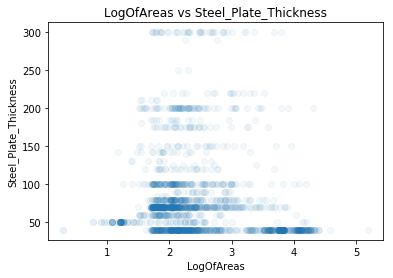

In [19]:
plt.plot(data['LogOfAreas'], data['Steel_Plate_Thickness'], 'o', alpha = 0.05)
plt.xlabel('LogOfAreas')
plt.ylabel('Steel_Plate_Thickness')
plt.title('LogOfAreas vs Steel_Plate_Thickness')
pass

Можно выбрать любую пару признаков и нарисовать диаграмму рассеяния для этой пары признаков, изображая точки, соответствующие объектам из разных классов разным цветом: 0 – синим, 1 – красным. Например, для пары признаков LogOfAreas, Steel_Plate_Thickness получаем следующую диаграмму:

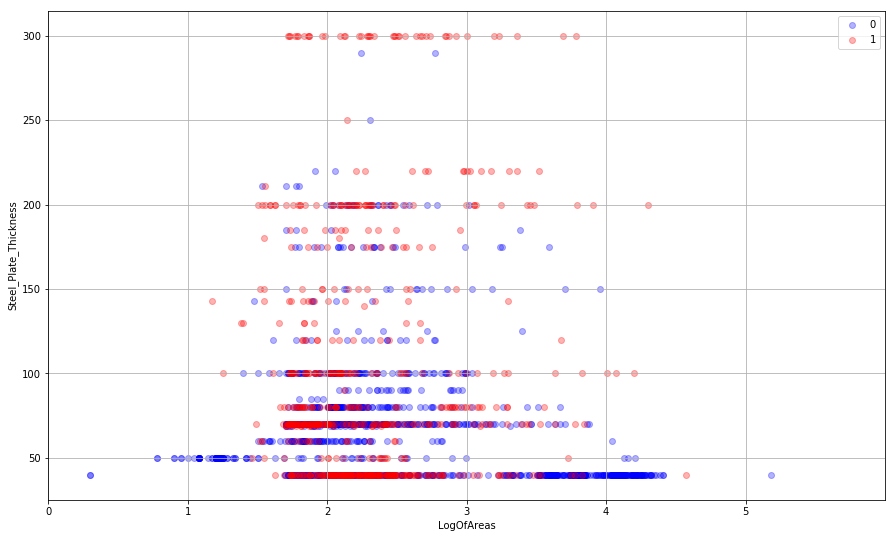

In [20]:
plt.figure(figsize = (15, 9))

plt.scatter(data[data['Other_Faults'] == 0]['LogOfAreas'],
            data[data['Other_Faults'] == 0]['Steel_Plate_Thickness'],
            alpha = 0.3,
            label = 0,
            color = 'b')

plt.scatter(data[data['Other_Faults'] == 1]['LogOfAreas'],
            data[data['Other_Faults'] == 1]['Steel_Plate_Thickness'],
            alpha = 0.3,
            label = 1,
            color = 'r')

plt.xlabel('LogOfAreas')
plt.xticks(range(6))
plt.xlim(0, 6)
plt.ylabel('Steel_Plate_Thickness')
plt.legend()
plt.grid()

Из данной диаграммы видно, что корреляция между признаками Other_Faults и LogOfAreas, а также Other_Faults и Steel_Plate_Thickness довольна слабая.

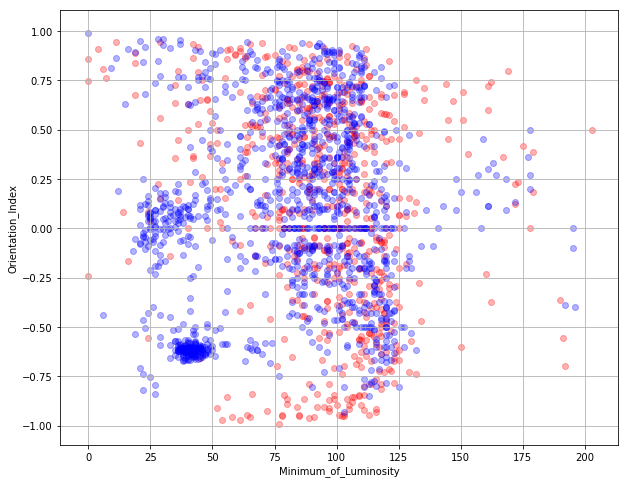

In [21]:
plt.figure(figsize = (10, 8))

plt.scatter(data[data['Other_Faults'] == 1]['Minimum_of_Luminosity'],
            data[data['Other_Faults'] == 1]['Orientation_Index'],
            alpha = 0.3,
            label = 1,
            color = 'r')

plt.scatter(data[data['Other_Faults'] == 0]['Minimum_of_Luminosity'],
            data[data['Other_Faults'] == 0]['Orientation_Index'],
            alpha = 0.3,
            label = 0,
            color = 'b')

plt.xlabel('Minimum_of_Luminosity')
plt.ylabel('Orientation_Index')
plt.grid()

А в данном случае, прекрасно видно, что корреляция между признаками Other_Faults и Minimum_of_Luminosity, а также Other_Faults и Orientation_Index довольна сильная.

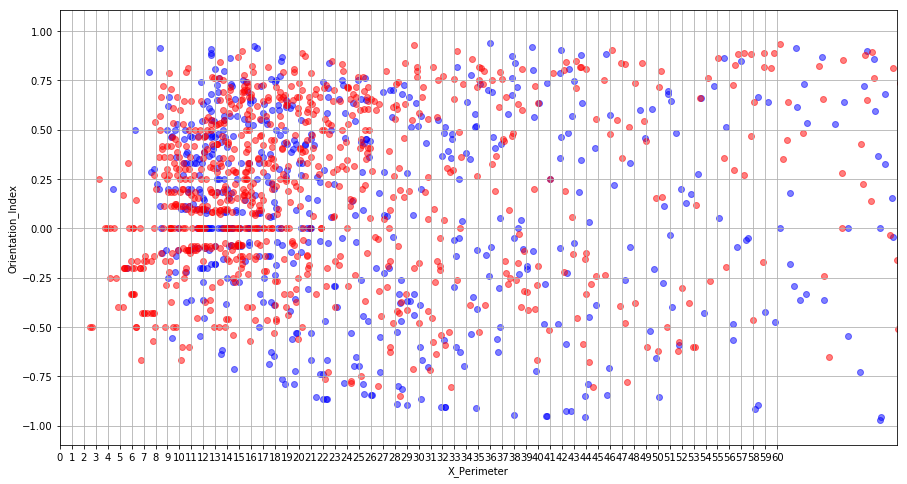

In [22]:
np.random.seed(0)
education_num_rnd = data['X_Perimeter'] + np.random.rand(data.shape[0]) - .17

plt.figure(figsize = (15, 8))

plt.scatter(education_num_rnd[data['Other_Faults'] == 1],
            data[data['Other_Faults'] == 1]['Orientation_Index'],
            alpha = 0.5,
            label = 1,
            color = 'b')

plt.scatter(education_num_rnd[data['Other_Faults'] == 0],
            data[data['Other_Faults'] == 0]['Orientation_Index'],
            alpha = 0.5,
            label = 0,
            color = 'r')

plt.xlabel('X_Perimeter')
plt.xticks(range(61))
plt.xlim(0, 70)
plt.ylabel('Orientation_Index')
plt.grid()

Узнать, какие значения принимает определённый признак:

In [23]:
data['Outside_Global_Index'].unique()

array([1. , 0.5, 0. ])

In [24]:
data['Pastry'].unique()

array([1, 0], dtype=int64)

In [25]:
data['Stains'].unique()

array([0, 1], dtype=int64)

In [26]:
data['Maximum_of_Luminosity'].unique()

array([108, 123, 125, 126, 127, 199, 172, 148, 143, 119, 158, 111, 133,
       134, 141, 150, 118, 140, 124, 132, 135, 100, 116, 110, 109, 149,
        94, 101,  93,  92,  97, 128,  95, 151, 156, 117,  86,  84, 103,
        78,  79,  85, 115,  71, 113, 120,  77,  70, 142, 198, 207, 189,
       206, 221, 213, 212, 236, 210, 188, 205, 191, 174, 181, 164, 182,
       183, 180, 175, 129, 130, 136, 144, 157, 122, 139, 145, 131,  82,
       159, 112, 121, 102, 252, 190, 220, 114, 253,  99, 247, 104, 106,
        96,  87,  37,  39, 197, 166, 196, 165, 167], dtype=int64)

# ЗАДАЧА

TypeOfSteel_A300, TypeOfSteel_A400, Outside_Global_Index можно убрать

Среди всех зависимых переменных: Pastry, Z_Scratch, K_Scatch, Stains, Dirtiness, Bumps, Other_Faults оставим только одну Pastry

In [27]:
data = data.drop('TypeOfSteel_A300', axis = 1)\
           .drop('TypeOfSteel_A400', axis = 1)\
           .drop('Outside_Global_Index', axis = 1)\
           .drop('Z_Scratch', axis = 1)\
           .drop('K_Scatch', axis = 1)\
           .drop('Stains', axis = 1)\
           .drop('Dirtiness', axis = 1)\
           .drop('Bumps', axis = 1)\
           .drop('Other_Faults', axis = 1)

In [28]:
#data

# Готовим данные

In [29]:
data['X_Minimum'].dtype.name

'int64'

In [30]:
data['Luminosity_Index'].dtype.name

'float64'

In [31]:
categorical_columns = []
numerical_columns = []
for c in data.columns:
    if data[c].dtype.name == 'object':
        categorical_columns.append(c)
    else:
        numerical_columns.append(c)

In [32]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

[]
['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity', 'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer', 'Steel_Plate_Thickness', 'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index', 'Edges_X_Index', 'Edges_Y_Index', 'LogOfAreas', 'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index', 'SigmoidOfAreas', 'Pastry']


In [33]:
for c in numerical_columns:
    print(c, data[c].unique())

X_Minimum [  42  645  829  853 1289  430  413  190  330   74  106  505   46  581
  451  669  156   90   82 1601   17   43   63   75 1363 1358 1404 1281
   49  830   91  161 1328 1251  733   12  162    0 1617 1152 1259 1545
 1580  450 1625 1495  958 1536  780 1140   13   11 1589  765 1268  333
 1287 1088 1255  707 1186  626 1503 1533  788   34 1604 1610  482 1067
  623  446  375  125  124 1321  817  808 1327   64   57  921 1201 1227
  959  320  159 1265 1343  557 1058  971  374 1027 1554  179  980 1579
  225 1465 1360 1155 1325 1260 1245 1687 1507 1688 1685 1571  757 1568
 1575 1395    5 1578 1595   10 1593    9 1505 1470 1643 1555  923 1540
   83 1136 1331  172   30  389   41  295  268   62   18   16   19   14
   15 1166    7   37   39  193  145  141   68   81   94    3  144  166
  158  174  513   25  185  134  385 1147  260    1  369  436  506  109
   51  397  703  405  135    8  216  226    2  123   65   27  244  138
   66  168  157  189   61  176  460  137  212  114  242   38  107  

Sum_of_Luminosity [24220 11397  7972 ... 37572 52715 11682]
Minimum_of_Luminosity [ 76  84  99  37  64  23 124  53  97 102  62  36  50  11  79  92  96  87
 101 107 123  77  75  33  51  47  80  70  15  55  73  90  65  66  88  67
  85  91  95 100  72  69 120  94  81  71  58  16  89  21 106  78  68  63
  44  49 103 111  46  19  30  45  38  86  74 110  28 116 108 109 104  98
 105  93  40 113  22  29  43  82 114  52  42  41 117 112 115  48 119 122
 118 168 178 157 195 172 196 192 163 164 177 143 128 141 139 161 150 134
 148 159 156 158   6  61  54   0  24  18  25  27  31  26  32  34  35  39
 132 126  56   9 127 125 121 129  83 130  12 136  59  57   4 203   7 133
 131 169 191 190 179 147 175 167 160 151 173 162 153 145 135 144  14]
Maximum_of_Luminosity [108 123 125 126 127 199 172 148 143 119 158 111 133 134 141 150 118 140
 124 132 135 100 116 110 109 149  94 101  93  92  97 128  95 151 156 117
  86  84 103  78  79  85 115  71 113 120  77  70 142 198 207 189 206 221
 213 212 236 210 188 20

LogOfAreas [2.4265 2.0334 1.8513 2.2455 3.3818 2.7993 3.9567 2.1206 2.4216 3.1778
 2.6454 2.4533 2.6812 2.6365 2.8621 3.0402 3.7028 2.7419 2.1367 2.3201
 2.1847 2.0253 2.3032 2.233  2.5966 1.9294 3.5071 2.5866 2.2601 2.7218
 2.1987 2.3304 2.9974 2.5647 2.5052 2.5775 2.3222 2.5106 2.3692 2.5315
 1.9912 1.7482 1.9542 1.7404 1.7634 2.7536 2.1875 2.2742 2.1644 1.7076
 2.2648 1.8261 1.8062 1.7243 1.7781 1.8808 1.8195 1.8451 2.5821 2.0414
 1.7993 1.9494 2.2787 1.9085 1.4771 2.1931 3.4221 3.3314 3.1526 2.0128
 1.6021 4.038  2.1303 2.0569 1.9138 2.4393 2.4609 2.4955 2.6405 2.8802
 2.8306 2.3243 1.716  2.4166 2.2577 2.0374 2.0086 2.1271 2.4249 2.9868
 2.7118 2.0645 3.3962 2.3997 2.2175 2.0492 2.3181 2.5276 2.2227 2.301
 2.5551 2.5428 2.1461 2.5786 2.0828 2.8819 2.935  2.525  2.3838 2.5705
 2.8998 2.356  2.9671 2.433  2.887  2.673  2.4548 2.0792 3.6708 2.2553
 2.2304 1.9191 3.4322 2.248  2.3444 2.017  3.521  2.6998 2.4639 2.6474
 2.4116 2.2253 2.1335 2.0756 2.4099 2.4232 2.0212 2.1614 2.0899 2.3

# Обрабатываем пропущенные значения

Пропущенные значения для каждой количественной переменной её можно заменить медианным значением. А для категориальных признаков - заполнить самым популярным значением в столбце.

Узнать количество заполненных (непропущенных) элементов можно с помощью метода count. Параметр axis = 0 указывает, что мы двигаемся по размерности 0 (сверху вниз), а не размерности 1 (слева направо), т.е. нас интересует количество заполненных элементов в каждом столбце, а не строке:

In [34]:
data.count(axis=0)

X_Minimum                1941
X_Maximum                1941
Y_Minimum                1941
Y_Maximum                1941
Pixels_Areas             1941
X_Perimeter              1941
Y_Perimeter              1941
Sum_of_Luminosity        1941
Minimum_of_Luminosity    1941
Maximum_of_Luminosity    1941
Length_of_Conveyer       1941
Steel_Plate_Thickness    1941
Edges_Index              1941
Empty_Index              1941
Square_Index             1941
Outside_X_Index          1941
Edges_X_Index            1941
Edges_Y_Index            1941
LogOfAreas               1941
Log_X_Index              1941
Log_Y_Index              1941
Orientation_Index        1941
Luminosity_Index         1941
SigmoidOfAreas           1941
Pastry                   1941
dtype: int64

Узнаем размерность таблицы:

In [35]:
print(data.shape)

(1941, 25)


Видно, что в данном dataset пропущенные значения отсутстуют.

# Векторизация

Библиотека scikit-learn не умеет напрямую обрабатывать категориальные признаки. Поэтому прежде чем подавать данные на вход алгоритмов машинного обучения нужно преобразовать категориальные признаки в количественные.

In [36]:
data[categorical_columns].count(axis = 0)

Series([], dtype: int64)

Категориальные (номинальные) признаки в данном dataset отсутствут

# Нормализация количественных признаков

Многие алгоритмы машинного обучения чувствительны к масштабированию данных. К таким алгоритмам, например, относится метод ближайших соседей, машина опорных векторов и др. В этом случае количественные признаки полезно нормализовать.

Нормализуем количественные признаки, приведя их к нулевому среднему и еденичному среднеквадратичному отклонению

In [37]:
data_numerical = data[numerical_columns]
data_numerical.describe()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry
count,1941.000000,1941.000000,1.941000e+03,1.941000e+03,1941.000000,1941.000000,1941.000000,1.941000e+03,1941.000000,1941.000000,...,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000
mean,571.136012,617.964451,1.650685e+06,1.650739e+06,1893.878413,111.855229,82.965997,2.063121e+05,84.548686,130.193715,...,0.033361,0.610529,0.813472,2.492388,1.335686,1.403271,0.083288,-0.131305,0.585420,0.081401
std,520.690671,497.627410,1.774578e+06,1.774590e+06,5168.459560,301.209187,426.482879,5.122936e+05,32.134276,18.690992,...,0.058961,0.243277,0.234274,0.788930,0.481612,0.454345,0.500868,0.148767,0.339452,0.273521
min,0.000000,4.000000,6.712000e+03,6.724000e+03,2.000000,2.000000,1.000000,2.500000e+02,0.000000,37.000000,...,0.001500,0.014400,0.048400,0.301000,0.301000,0.000000,-0.991000,-0.998900,0.119000,0.000000
25%,51.000000,192.000000,4.712530e+05,4.712810e+05,84.000000,15.000000,13.000000,9.522000e+03,63.000000,124.000000,...,0.006600,0.411800,0.596800,1.924300,1.000000,1.079200,-0.333300,-0.195000,0.248200,0.000000
50%,435.000000,467.000000,1.204128e+06,1.204136e+06,174.000000,26.000000,25.000000,1.920200e+04,90.000000,127.000000,...,0.010100,0.636400,0.947400,2.240600,1.176100,1.322200,0.095200,-0.133000,0.506300,0.000000
75%,1053.000000,1072.000000,2.183073e+06,2.183084e+06,822.000000,84.000000,83.000000,8.301100e+04,106.000000,140.000000,...,0.023500,0.800000,1.000000,2.914900,1.518500,1.732400,0.511600,-0.066600,0.999800,0.000000
max,1705.000000,1713.000000,1.298766e+07,1.298769e+07,152655.000000,10449.000000,18152.000000,1.159141e+07,203.000000,253.000000,...,0.875900,1.000000,1.000000,5.183700,3.074100,4.258700,0.991700,0.642100,1.000000,1.000000


In [38]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)

In [39]:
data_numerical.describe()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry
count,1.941000e+03,1.941000e+03,1.941000e+03,1.941000e+03,1.941000e+03,1.941000e+03,1.941000e+03,1.941000e+03,1.941000e+03,1.941000e+03,...,1.941000e+03,1.941000e+03,1.941000e+03,1.941000e+03,1.941000e+03,1.941000e+03,1.941000e+03,1.941000e+03,1.941000e+03,1.941000e+03
mean,5.319461e-16,8.431060e-17,-5.193624e-17,-1.544360e-17,-4.452904e-17,3.769096e-16,-1.451126e-16,-4.544421e-17,4.269297e-16,-4.893332e-16,...,1.143112e-15,2.190016e-15,-1.634876e-15,-1.194597e-14,7.411053e-15,8.714993e-15,-3.803129e-16,2.254479e-16,-6.445128e-16,1.881373e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.096882e+00,-1.233783e+00,-9.264019e-01,-9.264194e-01,-3.660430e-01,-3.647141e-01,-1.921906e-01,-4.022345e-01,-2.631106e+00,-4.986023e+00,...,-5.403743e-01,-2.450412e+00,-3.265721e+00,-2.777672e+00,-2.148383e+00,-3.088558e+00,-2.144852e+00,-5.831911e+00,-1.374040e+00,-2.976055e-01
25%,-9.989348e-01,-8.559907e-01,-6.646265e-01,-6.646367e-01,-3.501775e-01,-3.215547e-01,-1.640535e-01,-3.841355e-01,-6.705826e-01,-3.313743e-01,...,-4.538767e-01,-8.168824e-01,-9.248682e-01,-7.200746e-01,-6.970059e-01,-7.132712e-01,-8.317313e-01,-4.281529e-01,-9.934266e-01,-2.976055e-01
50%,-2.614528e-01,-3.033684e-01,-2.516411e-01,-2.516653e-01,-3.327642e-01,-2.850352e-01,-1.359164e-01,-3.652401e-01,1.696417e-01,-1.708692e-01,...,-3.945156e-01,1.063453e-01,5.716724e-01,-3.191518e-01,-3.313586e-01,-1.784355e-01,2.378344e-02,-1.139334e-02,-2.330830e-01,-2.976055e-01
75%,9.254323e-01,9.124006e-01,3.000082e-01,2.999821e-01,-2.073884e-01,-9.247802e-02,7.972909e-05,-2.406845e-01,6.675524e-01,5.246530e-01,...,-1.672474e-01,7.788300e-01,7.961962e-01,5.355503e-01,3.795877e-01,7.244023e-01,8.551401e-01,4.349427e-01,1.220732e+00,-2.976055e-01
max,2.177615e+00,2.200513e+00,6.388546e+00,6.388491e+00,2.916945e+01,3.431882e+01,4.236755e+01,2.222378e+01,3.686136e+00,6.570346e+00,...,1.428973e+01,1.600938e+00,7.961962e-01,3.411345e+00,3.609576e+00,6.284712e+00,1.813676e+00,5.198773e+00,1.221321e+00,3.358422e+00


В данном dataset все признаки количественные. 

# X и y

Для удобства отдельно рассмотрим столбцы, соответствующие входным признакам (это будет матрица X), а отдельно – выделенный признак (вектор y):

In [40]:
y = data['Pastry']
X = data.drop(('Pastry'), axis = 1) # выбрасываем столбец 'Pastry'
feature_names = X.columns
#print feature_names

In [41]:
type(feature_names)

pandas.core.indexes.base.Index

In [42]:
feature_names

Index(['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas',
       'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'Steel_Plate_Thickness', 'Edges_Index', 'Empty_Index', 'Square_Index',
       'Outside_X_Index', 'Edges_X_Index', 'Edges_Y_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas'],
      dtype='object')

In [43]:
print(X.shape)
print(y.shape)
N, d = X.shape

(1941, 24)
(1941,)


Теперь у нас 24 входных признака

# Обучающая и тестовая выборки

Почти все готово, чтобы запустить алгоритмы машинного обучения.

Обучаться мы будем на обучающей выборке, а проверять качество построенной модели – на тестовой. 

В рассматриваемой задаче мы сами разобьем имеющиеся у нас данные на обучающую и тестовую выборки. Для этого воспользуемся функцией train_test_split из модуля sklearn.cross_validation. и разобьем данные на обучающую/тестовую выборки в отношении 70%:30%:

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

1358 583


X_train, y_train – это обучающая выборка, X_test, y_test – тестовая.

In [45]:
1358+583

1941

сходится

# Алгоритмы машинного обучения

## Метод kNN – метод ближайших соседей

###    Подбор параметров для kNN

Для нового объекта алгоритм ищет в обучающей выборке k наиболее близких объекта и относит новый объект к тому классу, которому принадлежит большинство из них.

Количество соседей k соответствует параметру n_neighbors. По умолчанию, n_neighbors = 5.

В начале обучим модель:

In [46]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

После того, как модель обучена, мы можем предсказывать значение целевого признака по входным признакам для новых объектов с помощью метода predict.

Нас интересует качество построенной модели, поэтому будем предсказывать значение выходного признака на тех данных, для которых оно известно: на обучающей и (что более важно) тестовой выборках:

In [47]:
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)

0.0817378497790869 0.08747855917667238


err_train и err_test – это ошибки на обучающей и тестовой выборках. Как мы видим, они составили 8.2% и 8.7%.

Для нас более важным является ошибка на тестовой выборке, так как мы должны уметь предсказывать правильное (по возможности) значение на новых объектах, которые при обучении были недоступны.

Попробуем уменьшить тестовую ошибку, варьируя параметры метода.

Основной параметр метода k ближайших соседей – это k.

Поиск оптимальных значений параметров можно осуществить с помощью класса GridSearchCV – поиск наилучшего набора параметров, доставляющих минимум ошибке перекрестного контроля (cross-validation). По умолчанию рассматривается 3-кратный перекрестный контроль.

Например, найдем наилучшее значение k среди значений [1, 3, 5, 7, 10, 15, 20, 25, 35, 45, 55]:

In [48]:
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.08173784977908694 10


В качестве оптимального метод выбрал значение k равное 10. Ошибка перекрестного контроля составила 8.2%, почти столько же, сколько и на обучающей выборке для 5 ближайших соседей.

Проверим, чему равны ошибки на обучающей и тестовой выборках при этом значении параметра:

In [49]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.0817378497790869 0.08061749571183534


Значение на тестовой выборке уменьшилось с 8,7% до 8,1% 

#### Получаем оптимальное число ближайших соседей равное 10. Вычислим необходимые значения, иcпользуя полученное значение.

In [50]:
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

In [51]:
err_test = 1 - knn.score(X_test, y_test) # Другой способ

In [52]:
err_test

0.0806174957118353

Ошибка на тестовой выборке составила 8.1%

# Метод SVC

In [53]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))

print(err_train, err_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.0 0.08061749571183534


Ошибка на тестовой выборке составила 8.1%


# Метод Random Forest

Воспользуемся одним из самых популярных алгоритмов машинного обучения – случайный лес – Random Forest.

Алгоритм строит ансамбль случайных деревьев, каждое из которых обучается на выборке, полученной из исходной с помощью процедуры изъятия с возвращением.

In [54]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 100)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print(err_train, err_test)

0.0 0.07032590051457976


Ошибка на тестовой выборке составила 6.7%.

## Отбор значимых признаков

Чем больше число, тем значимее признак. Сумма всех чисел равна 1. 
Упорядочим значимости и выведем их значения:

In [55]:
np.sum(rf.feature_importances_)

1.0

In [56]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(d):
    print("%2d. feature '%5s' (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))

Feature ranking:
 1. feature 'Orientation_Index' (0.089047)
 2. feature 'Length_of_Conveyer' (0.077021)
 3. feature 'Square_Index' (0.071303)
 4. feature 'Empty_Index' (0.051914)
 5. feature 'Minimum_of_Luminosity' (0.051452)
 6. feature 'Edges_Y_Index' (0.049688)
 7. feature 'Outside_X_Index' (0.045083)
 8. feature 'X_Maximum' (0.041025)
 9. feature 'Edges_X_Index' (0.038247)
10. feature 'Edges_Index' (0.038084)
11. feature 'Luminosity_Index' (0.037153)
12. feature 'Y_Maximum' (0.036502)
13. feature 'Log_Y_Index' (0.035379)
14. feature 'X_Minimum' (0.034874)
15. feature 'Steel_Plate_Thickness' (0.034464)
16. feature 'Y_Minimum' (0.034369)
17. feature 'Log_X_Index' (0.031775)
18. feature 'LogOfAreas' (0.031637)
19. feature 'Pixels_Areas' (0.031615)
20. feature 'Maximum_of_Luminosity' (0.030351)
21. feature 'X_Perimeter' (0.029099)
22. feature 'Sum_of_Luminosity' (0.026951)
23. feature 'Y_Perimeter' (0.026774)
24. feature 'SigmoidOfAreas' (0.026195)


Построим столбцовую диаграмму, графически представляющую значимость первых 24 признаков:

(-1, 24)

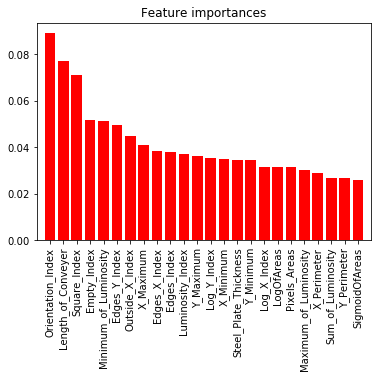

In [57]:
d_first = 24
plt.title("Feature importances")
plt.bar(range(d_first), importances[indices[:d_first]], align = 'center', color = 'r')
plt.xticks(range(d_first), feature_names[indices[:d_first]], rotation = 90)
plt.xlim([-1, d_first])

Все признаки играют большую роль в точности для алгоритмов kNN и SVC, особенно выделяется "Orientation_Index", имеющий самый высокий показатель (0.098)

# Метод Extremely Randomized Trees


In [58]:
ert = ensemble.ExtraTreesClassifier(n_estimators = 9).fit(X_train, y_train)

err_train = np.mean(y_train != ert.predict(X_train))
err_test  = np.mean(y_test  != ert.predict(X_test))

print(err_train, err_test)

0.0 0.06518010291595197


Ошибка на тестовой выборке составила 6.9%

# Метод AdaBoost

In [59]:
ada = ensemble.AdaBoostClassifier(n_estimators = 10)
ada.fit(X_train, y_train)

err_train = np.mean(y_train != ada.predict(X_train))
err_test = np.mean(y_test != ada.predict(X_test))

print(err_train, err_test)

0.05743740795287187 0.07375643224699828


Ошибка на тестовой выборке составила 7.4%

# Метод GBT  – градиентный бустинг деревьев решений

Метод, строящий ансамбль деревьев решений. На каждой итерации строится новый классификатор, аппроксимирующий значение градиента функции потерь.

In [60]:
gbt = ensemble.GradientBoostingClassifier(n_estimators = 10)
gbt.fit(X_train, y_train)

err_train = np.mean(y_train != gbt.predict(X_train))
err_test = np.mean(y_test != gbt.predict(X_test))

print(err_train, err_test)

0.0625920471281296 0.08061749571183534


Ошибка на тестовой выборке составила 8.1%

#### Самые минимальные ошибки на тестовых выборках были выявлены в методах Extremely Randomized Trees (6.9%) и Random Forest (6.7%)